In [16]:
import pickle
pickle_in = open("New_Dataset_X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("New_Dataset_y.pickle","rb")
y = pickle.load(pickle_in)

In [17]:
X.shape
h = X.shape[1]
w = X.shape[2]

In [18]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
vol = X.shape[1:]
prod = np.prod(vol)
x = X.reshape(X.shape[0],prod)

In [21]:
x.shape

(753, 67500)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

# Compute a PCA 



In [59]:
pca = PCA(n_components=110, whiten=True).fit(X_train)
 
# apply PCA transformation
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [60]:
pca.explained_variance_

array([63288092.65251779, 36137397.45202647, 16024638.79104661,
       13693886.9689939 , 11749003.17625127, 10231887.67496276,
        9526001.48441178,  8738115.58503979,  7613688.65062063,
        6767210.14294909,  5027742.21918899,  4582267.85845214,
        4135272.77720078,  3829193.1919966 ,  3233453.90531025,
        3129055.75398615,  2979897.1732396 ,  2875254.17385204,
        2641822.61683733,  2617892.32222869,  2259504.05397238,
        2174451.86264897,  2076729.99932522,  1944836.92575428,
        1923790.34899019,  1852018.42092675,  1751102.97493457,
        1700193.12811416,  1612849.69187026,  1602300.94773505,
        1506886.23270824,  1446440.18909998,  1421299.06556711,
        1398705.64499439,  1327120.77302558,  1320436.06723701,
        1282819.4262599 ,  1226987.19507439,  1214291.0940496 ,
        1173964.59768187,  1128767.39474114,  1080401.32511309,
        1062437.23466869,  1058396.99278449,  1029782.37613816,
         999345.69532836,   956335.86169

In [67]:
# train a neural network
print("Fitting the classifier to the training set")
clf = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, verbose=True, early_stopping=True).fit(X_train_pca, y_train)

Fitting the classifier to the training set
Iteration 1, loss = 1.15315584
Validation score: 0.315789
Iteration 2, loss = 0.93399182
Validation score: 0.403509
Iteration 3, loss = 0.79760530
Validation score: 0.508772
Iteration 4, loss = 0.67844754
Validation score: 0.508772
Iteration 5, loss = 0.58342967
Validation score: 0.543860
Iteration 6, loss = 0.50965829
Validation score: 0.578947
Iteration 7, loss = 0.44991697
Validation score: 0.578947
Iteration 8, loss = 0.39909508
Validation score: 0.596491
Iteration 9, loss = 0.35288454
Validation score: 0.578947
Iteration 10, loss = 0.31229870
Validation score: 0.561404
Iteration 11, loss = 0.27776254
Validation score: 0.561404
Iteration 12, loss = 0.24734747
Validation score: 0.578947
Iteration 13, loss = 0.22023016
Validation score: 0.578947
Iteration 14, loss = 0.19541609
Validation score: 0.596491
Iteration 15, loss = 0.17300952
Validation score: 0.578947
Iteration 16, loss = 0.15367019
Validation score: 0.578947
Iteration 17, loss = 0

In [68]:
target_names = ['Anam','Angad','achintya']
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Anam       0.61      0.78      0.69        63
       Angad       0.58      0.69      0.63        48
    achintya       0.63      0.42      0.51        78

    accuracy                           0.61       189
   macro avg       0.61      0.63      0.61       189
weighted avg       0.61      0.61      0.60       189



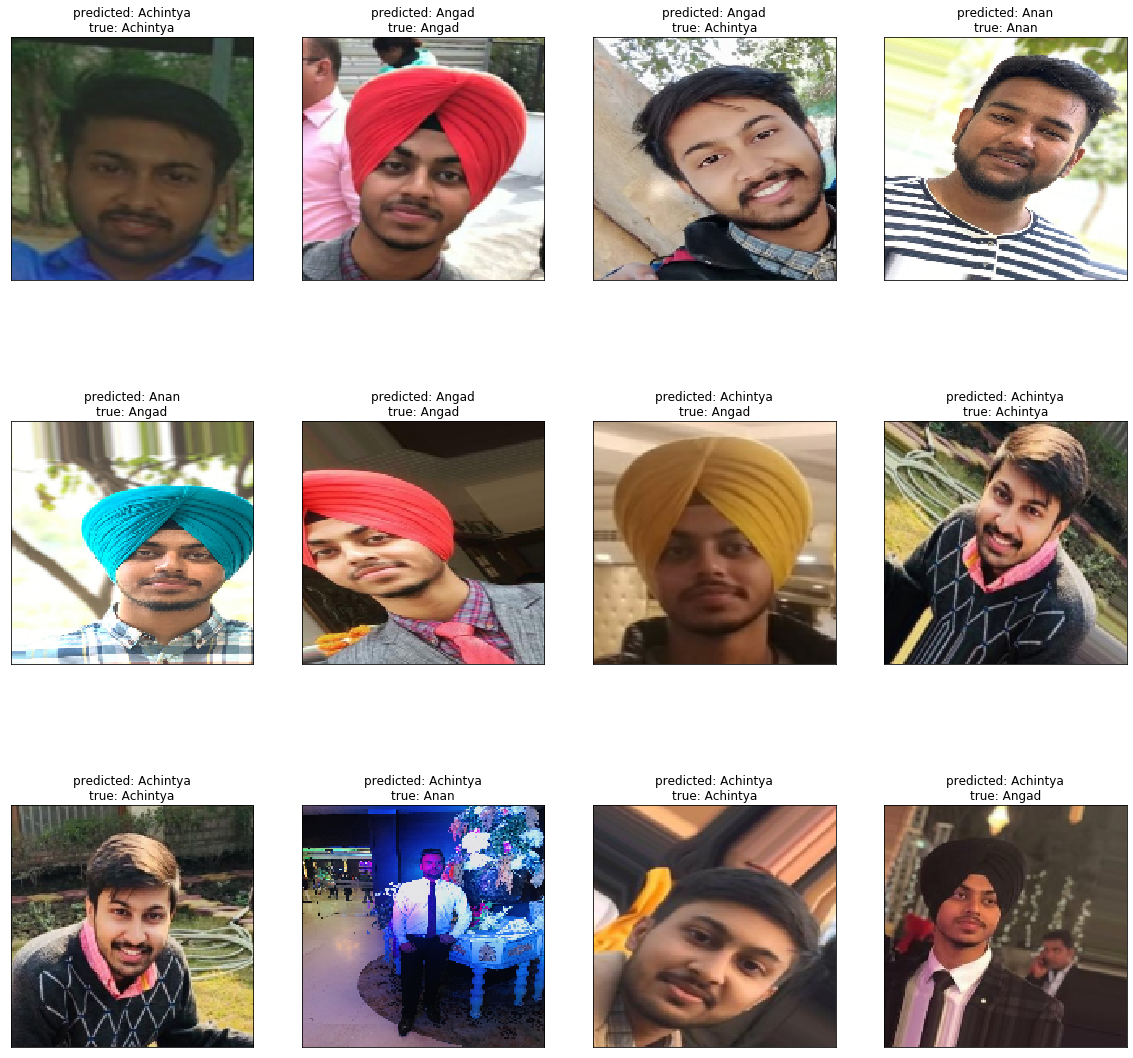

In [69]:
# Visualization
import matplotlib.pyplot as plt
import cv2

def plot_gallery(images, titles, h, w, rows=3, cols=4):
    plt.figure(figsize=(20,20))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow( cv2.cvtColor(images[i].reshape((h, w,3)), cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

def titles(y_pred, y_test, target_names):
    for i in range(y_pred.shape[0]):
        pred_name = y_pred[i]
        true_name = y_test[i]
        yield 'predicted: {0}\ntrue: {1}'.format(pred_name, true_name)

prediction_titles = list(titles(y_pred, y_test, target_names))
plot_gallery(X_test, prediction_titles, h, w)